In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-poster")

In [23]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [26]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

In [25]:
# turn y into a column vector
y = y[:, np.newaxis]

In [30]:
# Direct least squares regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.44522273]
 [1.02447787]]


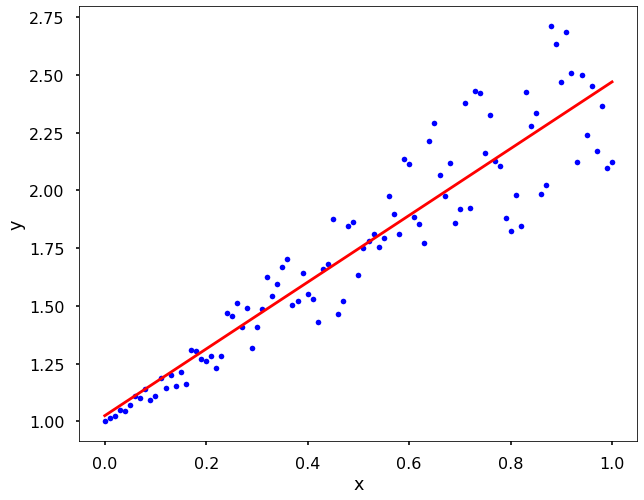

In [31]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha[0]*x + alpha[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [32]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.44522273]
 [1.02447787]]


In [33]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.44522273]
 [1.02447787]]


In [34]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [35]:
def func(x, a, b):
    y = a*x + b
    return y
alpha = optimize.curve_fit(func, xdata=x, ydata=y)[0]
print(alpha)

[1.48500667 1.00696256]


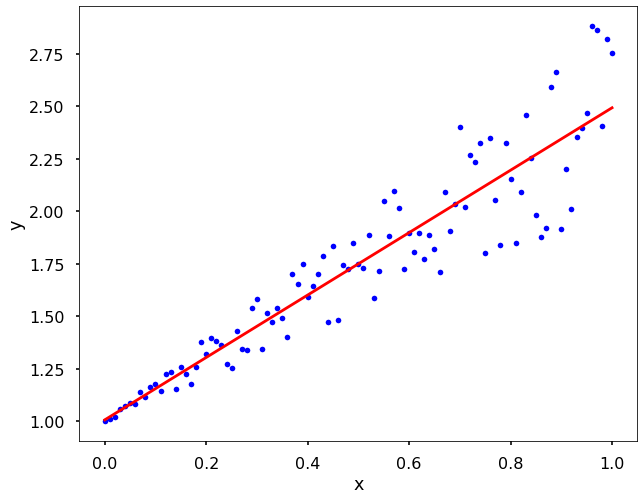

In [36]:
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha[0]*x + alpha[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [38]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

In [39]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

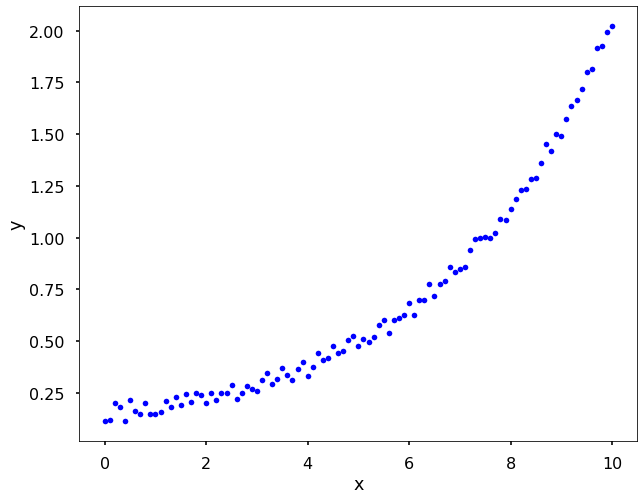

In [40]:
# Let's hae a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [42]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f"alpha={alpha}, beta={beta}")

alpha=0.13224545353066136, beta=0.26961667184569466


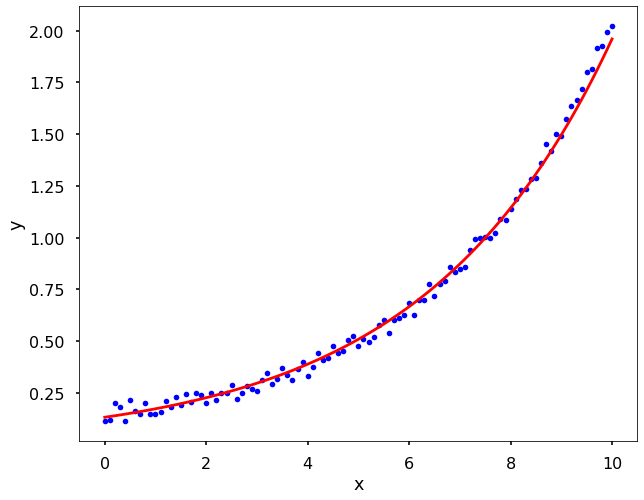

In [43]:
# Let’s have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha*np.exp(beta*x), "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [44]:
# Bài 4: K-means Clustering

In [68]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [69]:
means = [[2, 2], [8, 3], [3, 6], [5, 5]]
cov = [[1, 0], [0, 1]]
N = 1000
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0, X1, X2, X3), axis = 0)
K = 4

original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T

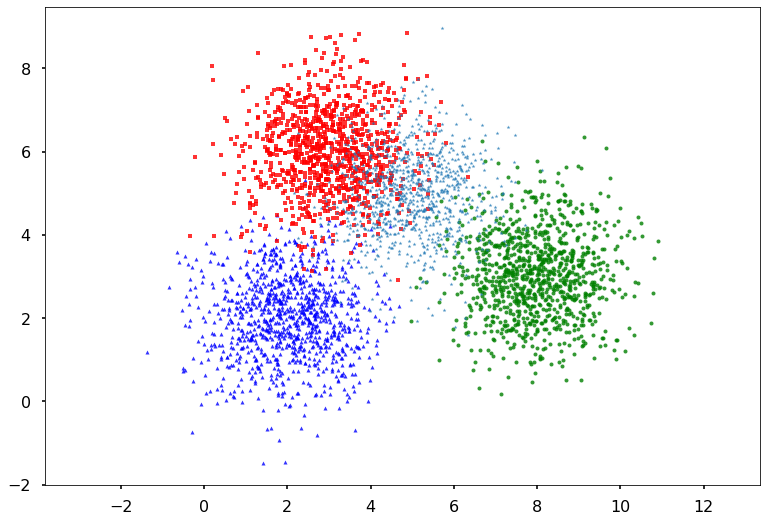

In [70]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], '*', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [71]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [73]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[4.9892523  4.99151375]
 [2.86986862 6.13283988]
 [7.99097856 3.01751636]
 [1.99934318 2.03496474]]


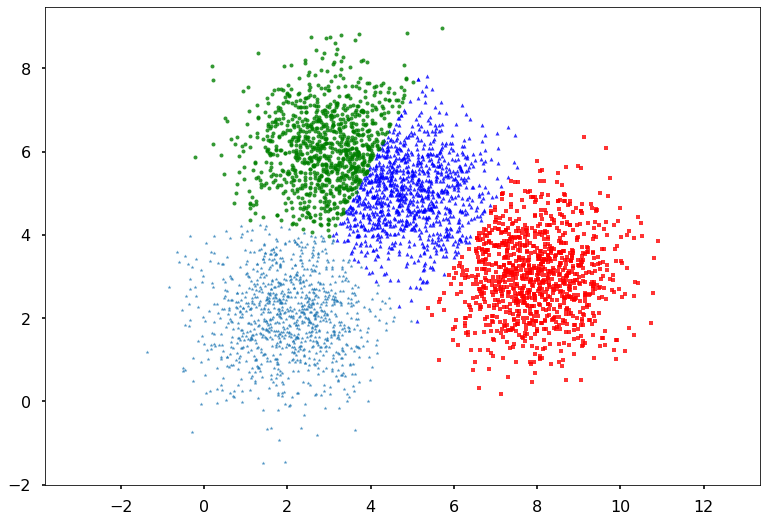

In [74]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])